In [75]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [76]:
#IMPLEMENTATION OF KNEIGHBOUR AND NEURAL NETWORK ALGORITHMS
#dataset upload into the enviroment and exploration
Dbeans = pd.read_csv("Dry_Beans_Rating.csv")
Dbeans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.3,208.2,173.9,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.007,0.003,0.834,0.999,SEKER
1,28734,638.0,200.5,182.7,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.007,0.004,0.910,0.998,SEKER
2,29380,624.1,212.8,175.9,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.007,0.003,0.826,0.999,SEKER
3,30008,645.9,210.6,182.5,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.007,0.003,0.862,0.994,SEKER
4,30140,620.1,201.8,190.3,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.007,0.004,0.942,0.999,SEKER


In [77]:
#exploration continued
Dbeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [78]:
Dbeans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283425,320.141826,202.270627,1.583217,0.750904,53768.200206,253.064227,0.749757,0.987529,0.873279,0.799867,0.006566,0.001710,0.643590,0.995063
std,29324.095717,214.289700,85.694040,44.970310,0.246704,0.092076,29774.915817,59.177104,0.049211,0.005147,0.059584,0.061797,0.001183,0.000659,0.098997,0.004377
min,20420.000000,524.700000,183.600000,122.500000,1.020000,0.220000,20684.000000,161.240000,0.560000,0.920000,0.490000,0.640000,0.003000,0.001000,0.410000,0.948000
25%,36328.000000,703.550000,253.300000,175.850000,1.430000,0.720000,36714.500000,215.070000,0.720000,0.990000,0.830000,0.760000,0.006000,0.001000,0.581000,0.994000
50%,44652.000000,794.900000,296.900000,192.400000,1.550000,0.760000,45178.000000,238.440000,0.760000,0.990000,0.880000,0.800000,0.007000,0.002000,0.642000,0.996000
75%,61332.000000,977.200000,376.500000,217.000000,1.710000,0.810000,62294.000000,279.445000,0.790000,0.990000,0.920000,0.830000,0.007000,0.002000,0.696000,0.998000
max,254616.000000,1985.400000,738.900000,460.200000,2.430000,0.910000,263261.000000,569.370000,0.870000,0.990000,0.990000,0.990000,0.010000,0.004000,0.975000,1.000000


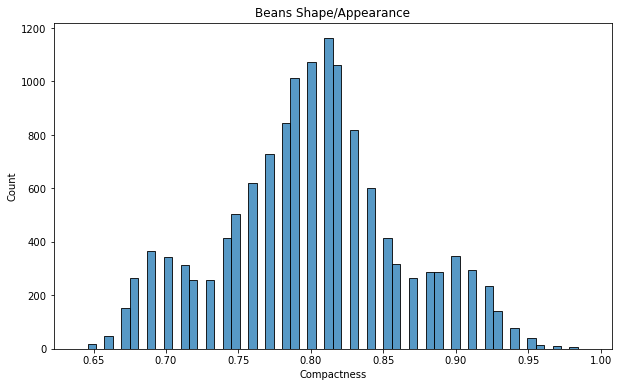

In [79]:
#More exploration and insight using histogram
plt.figure(figsize =(10,6))
sns.histplot(Dbeans.Compactness)
plt.title('Beans Shape/Appearance')
plt.show()

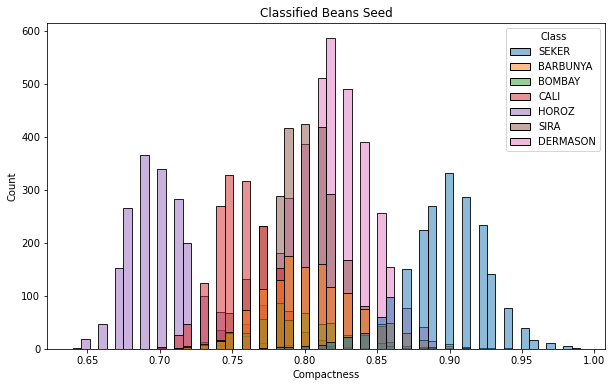

In [80]:
#checking the beans seed appearance based on class
plt.figure(figsize =(10,6))
sns.histplot(x ='Compactness', hue = "Class", data = Dbeans)
plt.title('Classified Beans Seed')
plt.show()

In [81]:
#splitting dataset into training and test data using train_test_split and dropping dependent column
from sklearn.model_selection import train_test_split
X = Dbeans.drop('Class',axis=1)
y = Dbeans['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 0)

In [82]:
#Dataset transformation process and training
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [83]:
#Applying  KNeighbors Classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p=2)
classifier.fit(X_train_s,y_train)

KNeighborsClassifier()

In [84]:
#Prediction test
y_pred=classifier.predict(X_test_s)
print(y_pred)

['DERMASON' 'DERMASON' 'DERMASON' ... 'SEKER' 'SIRA' 'DERMASON']


In [85]:
#trainig data check
print(y_test)

13027    DERMASON
11035    DERMASON
13205    DERMASON
7578         SIRA
1961        SEKER
           ...   
1874        SEKER
1067        SEKER
1115        SEKER
13228    DERMASON
11431    DERMASON
Name: Class, Length: 4084, dtype: object


In [86]:
#Summarizing results from the training
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('---------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.93


Confusion Matrix:
[[345   0  30   0   0   6   8]
 [  0 134   0   0   0   0   0]
 [ 13   0 475   0   7   2   4]
 [  0   0   0 984   1  20  52]
 [  0   0  14   3 569   0   8]
 [  5   0   1   7   0 547  19]
 [  3   0   3  79  15   5 725]] 


---------------------------------------------
Classification Report:

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.91      0.95      0.93       501
    DERMASON       0.92      0.93      0.92      1057
       HOROZ       0.96      0.96      0.96       594
       SEKER       0.94      0.94      0.94       579
        SIRA       0.89      0.87      0.88       830

    accuracy                           0.93      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.93      0.93      4084



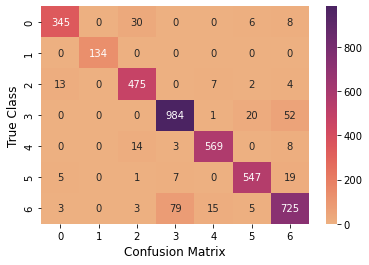

In [87]:
#Confusion matrix for the result
ax = sns.heatmap(cm,cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.xlabel('Confusion Matrix',fontsize=12)
plt.show()

In [88]:
#Applicatio of Neural network classifier
#checking for class imbalance using count and snsplot
Dbeans1 = Dbeans.copy()
Dbeans1['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

e:\Ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

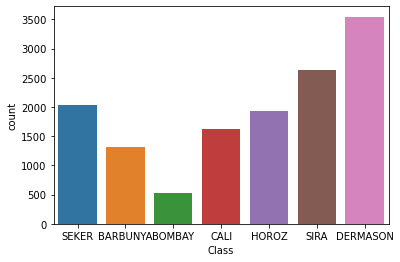

In [89]:
sns.countplot(Dbeans1['Class'])

In [90]:
#splitting the training and test datasets
#application of StandardScaler estimator 
X1 = Dbeans1.drop('Class',axis=1)
y1 = Dbeans1['Class']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.2, stratify=y, random_state=99)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# encode labels
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# calculate class weights
#le = LabelEncoder()
class_weights = {
    0: 1.23, # DERMASON
    1: 1.66, # SIRA
    2: 2.16, # SEKER
    3: 2.28, # HOROZ
    4: 2.71, # CALI
    5: 3.33, # BARBUNYA
    6: 8.42, # BOMBAY
}

y_train_encoded = le.fit_transform(y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}

# create and compile model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=50, verbose=2, class_weight=class_weights, validation_split=0.2)

Epoch 1/50
273/273 - 3s - loss: 1.9204 - accuracy: 0.7611 - val_loss: 1.3396 - val_accuracy: 0.7975 - 3s/epoch - 11ms/step
Epoch 2/50
273/273 - 1s - loss: 0.8139 - accuracy: 0.8285 - val_loss: 1.2330 - val_accuracy: 0.8283 - 667ms/epoch - 2ms/step
Epoch 3/50
273/273 - 1s - loss: 0.7591 - accuracy: 0.8356 - val_loss: 1.2658 - val_accuracy: 0.8416 - 665ms/epoch - 2ms/step
Epoch 4/50
273/273 - 1s - loss: 0.7288 - accuracy: 0.8354 - val_loss: 1.3165 - val_accuracy: 0.8398 - 706ms/epoch - 3ms/step
Epoch 5/50
273/273 - 1s - loss: 0.7099 - accuracy: 0.8354 - val_loss: 1.2793 - val_accuracy: 0.8343 - 694ms/epoch - 3ms/step
Epoch 6/50
273/273 - 1s - loss: 0.6905 - accuracy: 0.8395 - val_loss: 1.3483 - val_accuracy: 0.8370 - 688ms/epoch - 3ms/step
Epoch 7/50
273/273 - 1s - loss: 0.6723 - accuracy: 0.8387 - val_loss: 1.4766 - val_accuracy: 0.8407 - 677ms/epoch - 2ms/step
Epoch 8/50
273/273 - 1s - loss: 0.6742 - accuracy: 0.8392 - val_loss: 1.4335 - val_accuracy: 0.8338 - 667ms/epoch - 2ms/step
Ep

In [92]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 64)                1088      
                                                                 
 dense_88 (Dense)            (None, 64)                4160      
                                                                 
 dense_89 (Dense)            (None, 64)                4160      
                                                                 
 dense_90 (Dense)            (None, 64)                4160      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dense_92 (Dense)            (None, 16)                1040      
                                                                 
Total params: 18,768
Trainable params: 18,768
Non-tra

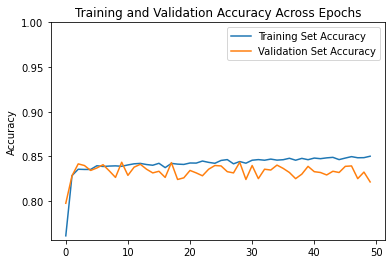

In [93]:
#plotting and evaluation of the algorithm used
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

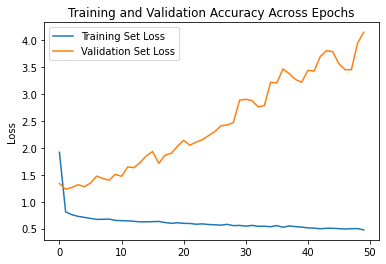

In [94]:
#visualizing  the loss for training and validation
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [95]:
#making a prediction
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

86/86 [==============================] - 0s 1ms/step


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.69      1.00      0.82       104
           2       0.69      0.96      0.80       326
           3       0.97      0.80      0.88       709
           4       0.91      0.97      0.94       386
           5       0.80      0.98      0.88       406
           6       0.78      0.93      0.85       527

    accuracy                           0.83      2723
   macro avg       0.69      0.81      0.74      2723
weighted avg       0.76      0.83      0.78      2723



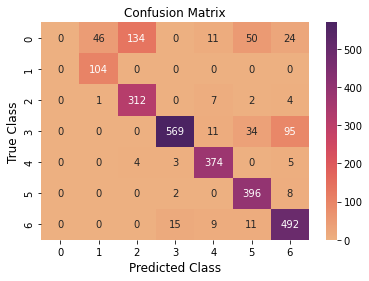

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

# encode labels in y_test
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# convert numeric predictions to corresponding class labels
class_labels = le.inverse_transform(y_pred)

# print classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred))

cm = confusion_matrix(y_test_encoded, y_pred)
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()
